In [13]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import pandas as pd
import numpy as np
# from matplotlib.cm import get_cmap


# mpl.rcParams.update(mpl.rcParamsDefault) #to reset style
style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')


In [14]:
#read the output file
df = pd.read_csv("strategic_output1D.csv")
df.head()


,index,n,m,Dimension,Distribution,Strategy,PSV,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,15,1D,normal,burial,0.0,Candidate 1,Candidate 13,1.035830,Candidate 4,2.307114,Candidate 13,1.0358298551763805,Candidate 1,1.000000,Candidate 1,1.000000
1,1,200,15,1D,normal,burial,0.0,Candidate 7,Candidate 5,1.013743,Candidate 1,1.008738,Candidate 5,1.0137426374211738,Candidate 7,1.000000,Candidate 7,1.000000
2,2,200,15,1D,normal,burial,0.0,Candidate 10,Candidate 13,1.452948,Candidate 0,1.291487,Candidate 12,1.0637543607789997,Candidate 6,1.000869,Candidate 10,1.000000
3,3,200,15,1D,normal,burial,0.0,Candidate 6,Candidate 4,1.094379,Candidate 13,1.083301,Candidate 4,1.0943790770045692,Candidate 6,1.000000,Candidate 1,1.000474
4,4,200,15,1D,normal,burial,0.0,Candidate 6,Candidate 6,1.000000,Candidate 10,2.406477,Candidate 4,1.0030601724829242,Candidate 4,1.003060,Candidate 4,1.003060


In [24]:
#make sure all distortion columns are numeric
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")
df.head()

,index,n,m,Dimension,Distribution,Strategy,PSV,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,15,1D,normal,burial,0.0,Candidate 1,Candidate 13,1.035830,Candidate 4,2.307114,Candidate 13,1.035830,Candidate 1,1.000000,Candidate 1,1.000000
1,1,200,15,1D,normal,burial,0.0,Candidate 7,Candidate 5,1.013743,Candidate 1,1.008738,Candidate 5,1.013743,Candidate 7,1.000000,Candidate 7,1.000000
2,2,200,15,1D,normal,burial,0.0,Candidate 10,Candidate 13,1.452948,Candidate 0,1.291487,Candidate 12,1.063754,Candidate 6,1.000869,Candidate 10,1.000000
3,3,200,15,1D,normal,burial,0.0,Candidate 6,Candidate 4,1.094379,Candidate 13,1.083301,Candidate 4,1.094379,Candidate 6,1.000000,Candidate 1,1.000474
4,4,200,15,1D,normal,burial,0.0,Candidate 6,Candidate 6,1.000000,Candidate 10,2.406477,Candidate 4,1.003060,Candidate 4,1.003060,Candidate 4,1.003060


In [25]:
#group by  n, m
group_by_m_n_normal = df.loc[df['Distribution'] == "normal"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_bimodal = df.loc[df['Distribution'] == "bimodal"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()


In [17]:
group_by_distribution_psv0  = df.loc[df['PSV'] == 0.0].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_psv0_1  = df.loc[df['PSV'] == 0.1].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_psv0_25  = df.loc[df['PSV'] == 0.25].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_psv0_5  = df.loc[df['PSV'] == 0.5].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_psv0_75  = df.loc[df['PSV'] == 0.75].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_psv1  = df.loc[df['PSV'] == 1.0].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))


In [18]:
group_by_distribution_psv0.head()

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
Distribution,,,,,,,,,,
bimodal,1.219309,1.684972,1.253173,2.619089,1.124968,1.395926,1.044857,1.228816,1.004471,1.067997
normal,1.249071,2.058743,1.380933,2.956643,1.066426,1.357198,1.006602,1.295603,1.000567,1.021085


# Add graphs to show differences in distortion by distribution and psv

In [19]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_psv_normal = df.loc[df['Distribution'] == 'normal'].groupby('PSV').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_psv_bimodal = df.loc[df['Distribution'] == 'bimodal'].groupby('PSV').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

In [22]:
accuracy_by_psv_normal.head()

,PSV,Plurality_percentage,Copeland_percentage,STV_percentage,Borda_percentage,PluralityVeto_percentage
0,0.00,16.0,9.8,20.4,66.6,86.2
1,0.10,14.2,12.0,20.6,66.4,86.4
2,0.25,16.0,16.4,23.8,63.8,84.6
3,0.50,16.8,21.2,25.0,64.2,82.0
4,0.75,15.0,24.8,25.2,62.8,80.2


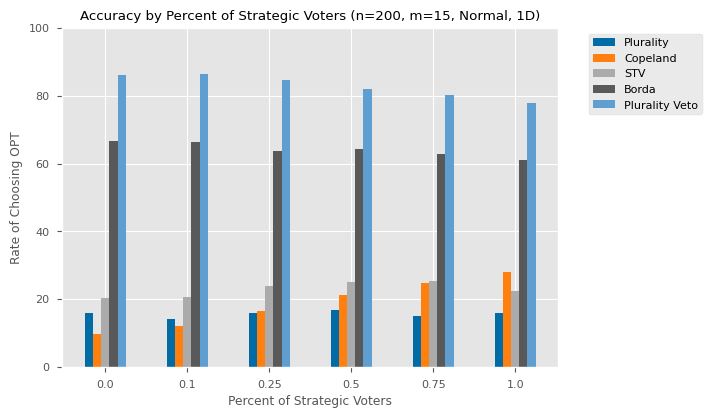

In [21]:
# Extract the data
psv_val = accuracy_by_psv_normal["PSV"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(psv_val))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_psv_normal["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_psv_normal["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_psv_normal["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_psv_normal["Borda_percentage"], width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, accuracy_by_psv_normal["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Percent of Strategic Voters")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Percent of Strategic Voters (n=200, m=15, Normal, 1D)")
plt.xticks(x, psv_val)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()